# Loading

In [1]:
import pandas as pd

In [2]:
import os
data_dir = "./data"
csv_names = ["companies.csv", "contacts.csv", "eng.csv"]
companies_csv_path, contacts_csv_path, eng_csv_path =  (os.path.join(data_dir, csv_name) for csv_name in csv_names)

In [9]:
from enum import Enum
class DataCategories(Enum):
    COMPANIES = 1
    CONTACTS = 2
    ENGAGEMENTS = 3

category_to_df = {
    DataCategories.COMPANIES: pd.read_csv(companies_csv_path),
    DataCategories.CONTACTS: pd.read_csv(contacts_csv_path),
    DataCategories.ENGAGEMENTS: pd.read_csv(eng_csv_path)
}

companies_df, contacts_df, engagements_df = category_to_df[DataCategories.COMPANIES], category_to_df[DataCategories.CONTACTS], category_to_df[DataCategories.ENGAGEMENTS]

# Preview

In [6]:
companies_df.head()

,company_id,size,linkedin_industry
0,0000fefd-9483-4bea-8afd-7317c1524e4c,"501-1,000",Mechanical or Industrial Engineering
1,0008e6fd-1afa-437b-b13a-7af7c20cbe7d,51-200,Oil & Energy
2,00123943-711c-431c-bcdb-70b392243892,"1,001-5,000",Plastics
3,001c539b-a1b6-4488-865a-2dbeff9274a5,"10,000+",Retail
4,001cc3be-2172-41e5-9cdc-1bb478c17252,"1,001-5,000",Oil & Energy


In [10]:
contacts_df.head()

,contact_id,position,seniority,function,company_id,country,state
0,0005ab2d-a790-44ce-8887-a571fca64d80,Chief Information Officer,CXO,IT,202f7f5a-1f0c-4924-9e4a-5100a15962cc,ca,ca-on
1,000d665c-7325-4b0f-a4d1-16c7c4c5b4b3,Vice President - Global Supply Chain and Human...,VP,HR,c592a266-a358-45dd-97ae-32a82db94d11,NaN,NaN
2,001b469f-d7cb-4c00-91c4-f14657febd8d,Director of Human Resources,Director,HR,51de6cc1-aac2-441f-bce0-6a468a284d29,NaN,NaN
3,0020badd-2a0b-4b47-a355-61724a954f85,"Vice President, Human Resource Operations",VP,"HR,Operations",13317617-14e2-4e4c-a1be-0623e0094dcb,us,ny
4,0026d482-3e6e-4619-995b-e5b15e88b214,Benefit Manager,Manager,Benefits,0b3a713b-94f9-4521-9449-dcf27243f468,us,fl


In [11]:
engagements_df.head()

,contact_id,campaign_id,email_id,timestamp,event
0,0005ab2d-a790-44ce-8887-a571fca64d80,a0d6c864-e82d-437c-a3de-9950070223a1,f688553a-8788-48cf-bf9e-24b1c22e4d7c,2020-07-09 01:52:22,delivered
1,0005ab2d-a790-44ce-8887-a571fca64d80,a0d6c864-e82d-437c-a3de-9950070223a1,bd4f138b-90f6-4fbc-9f41-16dc72f95352,2020-07-03 00:13:42,open
2,0005ab2d-a790-44ce-8887-a571fca64d80,a0d6c864-e82d-437c-a3de-9950070223a1,bd4f138b-90f6-4fbc-9f41-16dc72f95352,2020-07-03 00:08:54,delivered
3,000d665c-7325-4b0f-a4d1-16c7c4c5b4b3,0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd,73b710cd-649a-438e-a354-618f494bee86,2020-06-11 02:40:03,delivered
4,001b469f-d7cb-4c00-91c4-f14657febd8d,0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd,73b710cd-649a-438e-a354-618f494bee86,2020-06-10 22:42:03,delivered


# Values exploration

In [21]:
for category, df in category_to_df.items():
    print(f"{len(df)} {category}:\n", df.isnull().sum(), "\n")

4884 DataCategories.COMPANIES:
 company_id           0
size                 0
linkedin_industry    1
dtype: int64 

7697 DataCategories.CONTACTS:
 contact_id       0
position        13
seniority       67
function        72
company_id       0
country       1225
state         1351
dtype: int64 

25842 DataCategories.ENGAGEMENTS:
 contact_id     0
campaign_id    0
email_id       0
timestamp      0
event          0
dtype: int64 



In [24]:
engagements_df.event.value_counts()

delivered           20391
open                 4413
click                 874
survey completed      102
reply                  62
Name: event, dtype: int64

In [25]:
engagements_df[engagements_df.event == "delivered"]

,contact_id,campaign_id,email_id,timestamp,event
0,0005ab2d-a790-44ce-8887-a571fca64d80,a0d6c864-e82d-437c-a3de-9950070223a1,f688553a-8788-48cf-bf9e-24b1c22e4d7c,2020-07-09 01:52:22,delivered
2,0005ab2d-a790-44ce-8887-a571fca64d80,a0d6c864-e82d-437c-a3de-9950070223a1,bd4f138b-90f6-4fbc-9f41-16dc72f95352,2020-07-03 00:08:54,delivered
3,000d665c-7325-4b0f-a4d1-16c7c4c5b4b3,0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd,73b710cd-649a-438e-a354-618f494bee86,2020-06-11 02:40:03,delivered
4,001b469f-d7cb-4c00-91c4-f14657febd8d,0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd,73b710cd-649a-438e-a354-618f494bee86,2020-06-10 22:42:03,delivered
6,0020badd-2a0b-4b47-a355-61724a954f85,8baf9080-7319-439d-a423-4f990b34f77f,aba80728-356a-4ff0-a6ee-3208d30b9236,2020-04-07 13:56:41,delivered
...,...,...,...,...,...
25835,ffe5209b-7fc6-43d1-8e75-161dbb21a7cc,a0d6c864-e82d-437c-a3de-9950070223a1,bd4f138b-90f6-4fbc-9f41-16dc72f95352,2020-06-17 20:38:04,delivered
25836,ffe5209b-7fc6-43d1-8e75-161dbb21a7cc,a0d6c864-e82d-437c-a3de-9950070223a1,f3167a65-e841-48d8-9c9b-74269def88d0,2020-06-29 18:04:36,delivered
25837,ffe5209b-7fc6-43d1-8e75-161dbb21a7cc,a0d6c864-e82d-437c-a3de-9950070223a1,1389181d-7781-4982-a27a-9157922292cd,2020-07-07 23:04:03,delivered
25840,ffe5209b-7fc6-43d1-8e75-161dbb21a7cc,a0d6c864-e82d-437c-a3de-9950070223a1,f688553a-8788-48cf-bf9e-24b1c22e4d7c,2020-06-23 03:47:21,delivered


In [35]:
replies_emails = engagements_df[engagements_df.event == "reply"].email_id

In [36]:
replies_emails.nunique()

13

In [37]:
replies_emails = replies_emails.unique()

In [43]:
engagements_df[engagements_df.email_id.isin(replies_emails)].groupby('email_id').size()

email_id
06229446-e20c-471b-a46a-3fa34f5e4d15     641
0e25e45b-31d4-484c-91f9-19d60f470e89     439
2c2f54ec-110b-4bee-98e9-7caabdc4deda    1145
62cc33a9-9b74-4869-8678-7bd3b1f6d167     750
6a9c1a7a-d8a2-408d-bf71-3204875cae8d    1268
7026d670-f546-4f4e-9359-768be90ef914    1880
73b710cd-649a-438e-a354-618f494bee86    3376
aba80728-356a-4ff0-a6ee-3208d30b9236    1963
bd4f138b-90f6-4fbc-9f41-16dc72f95352    2629
cecdc7a3-93f0-4f93-8080-496eeb4f8bac    2034
e64793b8-8726-42d7-811f-52e9236e09c1     570
f3167a65-e841-48d8-9c9b-74269def88d0    1208
f688553a-8788-48cf-bf9e-24b1c22e4d7c    1862
dtype: int64

In [44]:
all_emails = engagements_df.email_id.unique()

In [45]:
all_emails

array(['f688553a-8788-48cf-bf9e-24b1c22e4d7c',
       'bd4f138b-90f6-4fbc-9f41-16dc72f95352',
       '73b710cd-649a-438e-a354-618f494bee86',
       'aba80728-356a-4ff0-a6ee-3208d30b9236',
       'cecdc7a3-93f0-4f93-8080-496eeb4f8bac',
       '7026d670-f546-4f4e-9359-768be90ef914',
       'd495b1e1-ab2b-4860-8e09-707fd43c20db',
       '66c6917a-4851-4c11-9246-1e21cfe87ebe',
       'ef84cc76-6d64-43e1-ac7c-d875e4cabd16',
       '62cc33a9-9b74-4869-8678-7bd3b1f6d167',
       '6c8dd981-93a2-4cc7-b40a-bccada584db1',
       '8fdf809e-ad2e-4369-9974-81ce4eb0641a',
       '06229446-e20c-471b-a46a-3fa34f5e4d15',
       '115d85bf-aa96-4c97-b1d0-d258ddbe869a',
       'd2b690a9-3398-42fc-b8a4-0c3263d6ebb6',
       '6a9c1a7a-d8a2-408d-bf71-3204875cae8d',
       '2c2f54ec-110b-4bee-98e9-7caabdc4deda',
       'f3167a65-e841-48d8-9c9b-74269def88d0',
       '1389181d-7781-4982-a27a-9157922292cd',
       'e64793b8-8726-42d7-811f-52e9236e09c1',
       '0e25e45b-31d4-484c-91f9-19d60f470e89',
       'c315c

In [58]:
engagements_df.sort_values(by="timestamp").drop_duplicates(subset=['email_id', 'contact_id', 'campaign_id'], keep="first").event.value_counts()

delivered           20250
open                   11
survey completed        1
Name: event, dtype: int64

##### dedup resulted in ~ #delievered.

## Check events chains

In [98]:
key_to_chains= [(k,list(g.event)) for k,g in engagements_df.sort_values(by="timestamp").groupby(['email_id', 'contact_id', 'campaign_id'])]

In [99]:
key_to_important_chains = list(filter(lambda p: len(p[1]) > 1, key_to_chains))

In [100]:
key_to_important_chains[:5]

[(('06229446-e20c-471b-a46a-3fa34f5e4d15',
   '041354b3-c4f7-4823-8f85-5e7b3128c7dc',
   '2911db62-d3a4-4198-94ae-141b8ff2fc1b'),
  ['delivered', 'open']),
 (('06229446-e20c-471b-a46a-3fa34f5e4d15',
   '092b512d-91c4-48f0-9044-ad7a5c55b450',
   '2911db62-d3a4-4198-94ae-141b8ff2fc1b'),
  ['delivered', 'open', 'open']),
 (('06229446-e20c-471b-a46a-3fa34f5e4d15',
   '10520e2c-93b6-42e2-923b-d48a11522b0a',
   '2911db62-d3a4-4198-94ae-141b8ff2fc1b'),
  ['delivered', 'open']),
 (('06229446-e20c-471b-a46a-3fa34f5e4d15',
   '132c58a0-8a88-4673-b33e-c1b81df607b8',
   '2911db62-d3a4-4198-94ae-141b8ff2fc1b'),
  ['delivered', 'open']),
 (('06229446-e20c-471b-a46a-3fa34f5e4d15',
   '1418900c-5485-4470-ba57-078a370821b9',
   '2911db62-d3a4-4198-94ae-141b8ff2fc1b'),
  ['delivered', 'open'])]

In [113]:
from collections import Counter
all_chains = set([tuple(Counter(c).items()) for k, c in key_to_chains])

In [128]:
engagements_df.sort_values(by='timestamp').drop_duplicates(subset=['email_id', 'contact_id', 'campaign_id', 'event']).pivot(index=['email_id', 'contact_id', 'campaign_id'], columns='event', values='timestamp').head()

event                                                                                                          click  \
email_id                             contact_id                           campaign_id                                  
06229446-e20c-471b-a46a-3fa34f5e4d15 0036e809-59be-4d78-bceb-4fa33bd737d8 2911db62-d3a4-4198-94ae-141b8ff2fc1b   NaN   
                                     01192ffd-54c5-4229-90b6-250f82e8fb41 2911db62-d3a4-4198-94ae-141b8ff2fc1b   NaN   
                                     011cc04b-7312-4bac-821f-3233ff170a3e 2911db62-d3a4-4198-94ae-141b8ff2fc1b   NaN   
                                     013261f4-c9d5-4051-9030-bf511013e634 2911db62-d3a4-4198-94ae-141b8ff2fc1b   NaN   
                                     01aa55b4-22cb-4dc9-bd68-c69fcfcee523 2911db62-d3a4-4198-94ae-141b8ff2fc1b   NaN   

event                                                                                                                     delivered  \
email_id                             contact_id                           campaign_id                                                 
06229446-e20c-471b-a46a-3fa34f5e4d15 0036e809-59be-4d78-bceb-4fa33bd737d8 2911db62-d3a4-4198-94ae-141b8ff2fc1b  2020-05-11 15:02:04   
                                     01192ffd-54c5-4229-90b6-250f82e8fb41 2911db62-d3a4-4198-94ae-141b8ff2fc1b  2020-05-07 23:22:04   
                                     011cc04b-7312-4bac-821f-3233ff170a3e 2911db62-d3a4-4198-94ae-141b8ff2fc1b  2020-05-22 23:17:04   
                                     013261f4-c9d5-4051-9030-bf511013e634 2911db62-d3a4-4198-94ae-141b8ff2fc1b  2020-05-08 04:27:59   
                                     01aa55b4-22cb-4dc9-bd68-c69fcfcee523 2911db62-d3a4-4198-94ae-141b8ff2fc1b  2020-05-08 16:07:04   

event                                                                                                          open  \
email_id                             contact_id                           campaign_id                                 
06229446-e20c-471b-a46a-3fa34f5e4d15 0036e809-59be-4d78-bceb-4fa33bd737d8 2911db62-d3a4-4198-94ae-141b8ff2fc1b  NaN   
                                     01192ffd-54c5-4229-90b6-250f82e8fb41 2911db62-d3a4-4198-94ae-141b8ff2fc1b  NaN   
                                     011cc04b-7312-4bac-821f-3233ff170a3e 2911db62-d3a4-4198-94ae-141b8ff2fc1b  NaN   
                                     013261f4-c9d5-4051-9030-bf511013e634 2911db62-d3a4-4198-94ae-141b8ff2fc1b  NaN   
                                     01aa55b4-22cb-4dc9-bd68-c69fcfcee523 2911db62-d3a4-4198-94ae-141b8ff2fc1b  NaN   

event                                                                                                          reply  \
email_id                             contact_id                           campaign_id                                  
06229446-e20c-471b-a46a-3fa34f5e4d15 0036e809-59be-4d78-bceb-4fa33bd737d8 2911db62-d3a4-4198-94ae-141b8ff2fc1b   NaN   
                                     01192ffd-54c5-4229-90b6-250f82e8fb41 2911db62-d3a4-4198-94ae-141b8ff2fc1b   NaN   
                                     011cc04b-7312-4bac-821f-3233ff170a3e 2911db62-d3a4-4198-94ae-141b8ff2fc1b   NaN   
                                     013261f4-c9d5-4051-9030-bf511013e634 2911db62-d3a4-4198-94ae-141b8ff2fc1b   NaN   
                                     01aa55b4-22cb-4dc9-bd68-c69fcfcee523 2911db62-d3a4-4198-94ae-141b8ff2fc1b   NaN   

event                                                                                                          survey completed  
email_id                             contact_id                           campaign_id                                            
06229446-e20c-471b-a46a-3fa34f5e4d15 0036e809-59be-4d78-bceb-4fa33bd737d8 2911db62-d3a4-4198-94ae-141b8ff2fc1b              NaN  
                                     01192ffd-54c5-4229-90b6-250f82e8fb41 2911db62-d3a4-4198-94ae-141b8ff2fc1b              NaN  
                  

In [122]:
chains_df = engagements_df.sort_values(by='timestamp').pivot_table(index=['email_id', 'contact_id', 'campaign_id'], columns='event', values='event', aggfunc=len, fill_value=0)

In [126]:
chains_df[chains_df.delivered > 1].mean()

event
click               0.071942
delivered           2.007194
open                0.352518
reply               0.007194
survey completed    0.028777
dtype: float64

In [129]:
chains_df[chains_df.delivered == 1].mean()

event
click               0.042910
delivered           1.000000
open                0.216388
reply               0.003033
survey completed    0.004823
dtype: float64

#### num of delivered emails is worth considering

In [130]:
chains_df.head()

event                                                                                                           click  \
email_id                             contact_id                           campaign_id                                   
06229446-e20c-471b-a46a-3fa34f5e4d15 0036e809-59be-4d78-bceb-4fa33bd737d8 2911db62-d3a4-4198-94ae-141b8ff2fc1b      0   
                                     01192ffd-54c5-4229-90b6-250f82e8fb41 2911db62-d3a4-4198-94ae-141b8ff2fc1b      0   
                                     011cc04b-7312-4bac-821f-3233ff170a3e 2911db62-d3a4-4198-94ae-141b8ff2fc1b      0   
                                     013261f4-c9d5-4051-9030-bf511013e634 2911db62-d3a4-4198-94ae-141b8ff2fc1b      0   
                                     01aa55b4-22cb-4dc9-bd68-c69fcfcee523 2911db62-d3a4-4198-94ae-141b8ff2fc1b      0   

event                                                                                                           delivered  \
email_id                             contact_id                           campaign_id                                       
06229446-e20c-471b-a46a-3fa34f5e4d15 0036e809-59be-4d78-bceb-4fa33bd737d8 2911db62-d3a4-4198-94ae-141b8ff2fc1b          1   
                                     01192ffd-54c5-4229-90b6-250f82e8fb41 2911db62-d3a4-4198-94ae-141b8ff2fc1b          1   
                                     011cc04b-7312-4bac-821f-3233ff170a3e 2911db62-d3a4-4198-94ae-141b8ff2fc1b          1   
                                     013261f4-c9d5-4051-9030-bf511013e634 2911db62-d3a4-4198-94ae-141b8ff2fc1b          1   
                                     01aa55b4-22cb-4dc9-bd68-c69fcfcee523 2911db62-d3a4-4198-94ae-141b8ff2fc1b          1   

event                                                                                                           open  \
email_id                             contact_id                           campaign_id                                  
06229446-e20c-471b-a46a-3fa34f5e4d15 0036e809-59be-4d78-bceb-4fa33bd737d8 2911db62-d3a4-4198-94ae-141b8ff2fc1b     0   
                                     01192ffd-54c5-4229-90b6-250f82e8fb41 2911db62-d3a4-4198-94ae-141b8ff2fc1b     0   
                                     011cc04b-7312-4bac-821f-3233ff170a3e 2911db62-d3a4-4198-94ae-141b8ff2fc1b     0   
                                     013261f4-c9d5-4051-9030-bf511013e634 2911db62-d3a4-4198-94ae-141b8ff2fc1b     0   
                                     01aa55b4-22cb-4dc9-bd68-c69fcfcee523 2911db62-d3a4-4198-94ae-141b8ff2fc1b     0   

event                                                                                                           reply  \
email_id                             contact_id                           campaign_id                                   
06229446-e20c-471b-a46a-3fa34f5e4d15 0036e809-59be-4d78-bceb-4fa33bd737d8 2911db62-d3a4-4198-94ae-141b8ff2fc1b      0   
                                     01192ffd-54c5-4229-90b6-250f82e8fb41 2911db62-d3a4-4198-94ae-141b8ff2fc1b      0   
                                     011cc04b-7312-4bac-821f-3233ff170a3e 2911db62-d3a4-4198-94ae-141b8ff2fc1b      0   
                                     013261f4-c9d5-4051-9030-bf511013e634 2911db62-d3a4-4198-94ae-141b8ff2fc1b      0   
                                     01aa55b4-22cb-4dc9-bd68-c69fcfcee523 2911db62-d3a4-4198-94ae-141b8ff2fc1b      0   

event                                                                                                           survey completed  
email_id                             contact_id                           campaign_id                                             
06229446-e20c-471b-a46a-3fa34f5e4d15 0036e809-59be-4d78-bceb-4fa33bd737d8 2911db62-d3a4-4198-94ae-141b8ff2fc1b                 0  
                                     01192ffd-54c5-4229-90b6-250f82e8fb41 2911db62-d3a4-4198-94ae-141b8ff2fc1b                 0  
                                     011cc04b-7312-4bac-821f-32

In [138]:
chains_df['success'] = chains_df.drop('delivered', axis=1).apply(lambda event_counts: sum(event_counts)> 1, axis=1)

In [243]:
chains_df

event                                                                                                           click  \
email_id                             contact_id                           campaign_id                                   
06229446-e20c-471b-a46a-3fa34f5e4d15 0036e809-59be-4d78-bceb-4fa33bd737d8 2911db62-d3a4-4198-94ae-141b8ff2fc1b      0   
                                     01192ffd-54c5-4229-90b6-250f82e8fb41 2911db62-d3a4-4198-94ae-141b8ff2fc1b      0   
                                     011cc04b-7312-4bac-821f-3233ff170a3e 2911db62-d3a4-4198-94ae-141b8ff2fc1b      0   
                                     013261f4-c9d5-4051-9030-bf511013e634 2911db62-d3a4-4198-94ae-141b8ff2fc1b      0   
                                     01aa55b4-22cb-4dc9-bd68-c69fcfcee523 2911db62-d3a4-4198-94ae-141b8ff2fc1b      0   
...                                                                                                               ...   
f688553a-8788-48cf-bf9e-24b1c22e4d7c ff561253-a3e4-4009-8ac8-9f56ed5c6866 a0d6c864-e82d-437c-a3de-9950070223a1      0   
                                     ff6aa07f-90f6-4692-9984-7aec67774a2b a0d6c864-e82d-437c-a3de-9950070223a1      0   
                                     ff8779d3-30a6-4284-92de-31e249a1ed15 a0d6c864-e82d-437c-a3de-9950070223a1      0   
                                     ffbafec8-c4ce-4e21-ba58-97681b1a81d5 a0d6c864-e82d-437c-a3de-9950070223a1      0   
                                     ffe5209b-7fc6-43d1-8e75-161dbb21a7cc a0d6c864-e82d-437c-a3de-9950070223a1      0   

event                                                                                                           delivered  \
email_id                             contact_id                           campaign_id                                       
06229446-e20c-471b-a46a-3fa34f5e4d15 0036e809-59be-4d78-bceb-4fa33bd737d8 2911db62-d3a4-4198-94ae-141b8ff2fc1b          1   
                                     01192ffd-54c5-4229-90b6-250f82e8fb41 2911db62-d3a4-4198-94ae-141b8ff2fc1b          1   
                                     011cc04b-7312-4bac-821f-3233ff170a3e 2911db62-d3a4-4198-94ae-141b8ff2fc1b          1   
                                     013261f4-c9d5-4051-9030-bf511013e634 2911db62-d3a4-4198-94ae-141b8ff2fc1b          1   
                                     01aa55b4-22cb-4dc9-bd68-c69fcfcee523 2911db62-d3a4-4198-94ae-141b8ff2fc1b          1   
...                                                                                                                   ...   
f688553a-8788-48cf-bf9e-24b1c22e4d7c ff561253-a3e4-4009-8ac8-9f56ed5c6866 a0d6c864-e82d-437c-a3de-9950070223a1          1   
                                     ff6aa07f-90f6-4692-9984-7aec67774a2b a0d6c864-e82d-437c-a3de-9950070223a1          1   
                                     ff8779d3-30a6-4284-92de-31e249a1ed15 a0d6c864-e82d-437c-a3de-9950070223a1          1   
                                     ffbafec8-c4ce-4e21-ba58-97681b1a81d5 a0d6c864-e82d-437c-a3de-9950070223a1          1   
                                     ffe5209b-7fc6-43d1-8e75-161dbb21a7cc a0d6c864-e82d-437c-a3de-9950070223a1          1   

event                                                                                                           open  \
email_id                             contact_id                           campaign_id                                  
06229446-e20c-471b-a46a-3fa34f5e4d15 0036e809-59be-4d78-bceb-4fa33bd737d8 2911db62-d3a4-4198-94ae-141b8ff2fc1b     0   
                                     01192ffd-54c5-4229-90b6-250f82e8fb41 2911db62-d3a4-4198-94ae-141b8ff2fc1b     0   
                                     011cc04b-7312-4bac-821f-3233ff170a3e 2911db62-d3a4-4198-94ae-141b8ff2fc1b     0   
                                     013261f4-c9d5-4051-9030-bf511013e634 2911db62-d3a4-4198-94ae-141b8ff2fc1b     0   
                                     01aa55b4-22cb-4dc9-bd68-c69fcfcee523 2911db

In [162]:
successful_prospects = chains_df[chains_df['success'] == True].index

In [244]:
engagements_df.timestamp = engagements_df.timestamp.apply(lambda t: pd.Timestamp(t))

In [245]:
successful_events = engagements_df[engagements_df.set_index(['email_id', 'contact_id', 'campaign_id']).index.isin(successful_prospects)]
failed_events = engagements_df[~engagements_df.index.isin(successful_prospects)]

In [246]:
successful_deliveries = successful_events[successful_events.event == "delivered"]
failed_deliveries = failed_events[failed_events.event == "delivered"]

## Event success - minutes statistics

In [249]:
successful_deliveries.timestamp.apply(lambda t: t.minute).describe()

count    760.000000
mean      29.782895
std       17.618904
min        0.000000
25%       14.750000
50%       30.000000
75%       46.000000
max       59.000000
Name: timestamp, dtype: float64

In [195]:
failed_deliveries.timestamp.apply(lambda t: t.minute).describe()

## Event success - hours statistics

In [250]:
successful_deliveries.timestamp.apply(lambda t: t.hour).describe()

count    760.000000
mean      13.406579
std        8.088392
min        0.000000
25%        4.000000
50%       16.000000
75%       20.000000
max       23.000000
Name: timestamp, dtype: float64

In [251]:
failed_deliveries.timestamp.apply(lambda t: t.hour).describe()

count    20391.000000
mean        13.422000
std          7.694446
min          0.000000
25%          4.000000
50%         16.000000
75%         19.000000
max         23.000000
Name: timestamp, dtype: float64

#### changes are minor - might imply that minute/hour is not of great concern as it is

## Time flow

<AxesSubplot:xlabel='timestamp'>

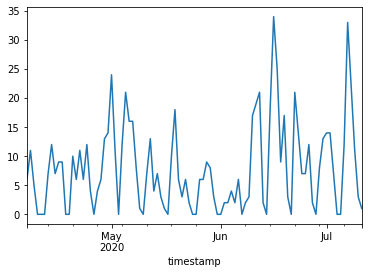

In [258]:
successful_deliveries.set_index('timestamp').resample('1D').size().plot()

<AxesSubplot:xlabel='timestamp'>

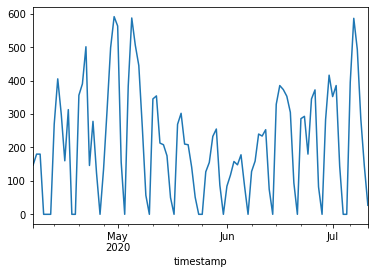

In [259]:
failed_deliveries.set_index('timestamp').resample('1D').size().plot()

In [276]:
failed_deliveries.groupby(failed_deliveries.timestamp.apply(lambda t:t.weekday())).size()

timestamp
0    3263
1    4580
2    4358
3    3921
4    3381
5     888
dtype: int64

In [275]:
successful_deliveries.groupby(successful_deliveries.timestamp.apply(lambda t:t.weekday())).size()

timestamp
0    111
1    187
2    161
3    133
4    132
5     36
dtype: int64

# Data preperations

X - represents successful delivers. prospect's features + number of previous deliveries


Y - hour of the week to send at

In [308]:
index_columns = ['email_id', 'contact_id', 'campaign_id']
df = engagements_df[engagements_df.event == "delivered"].merge(contacts_df, on="contact_id", how="left").merge(companies_df, on="company_id", how="left")
df = df.set_index(index_columns)
df['success'] = df.index.isin(successful_prospects)
df['prev_emails'] = df.sort_values('timestamp').groupby(index_columns).size() - 1
df['hour_of_week'] = df.timestamp.apply(lambda t: 24*t.weekday() + t.hour)

In [309]:
df.head()

timestamp  \
email_id                             contact_id                           campaign_id                                                
f688553a-8788-48cf-bf9e-24b1c22e4d7c 0005ab2d-a790-44ce-8887-a571fca64d80 a0d6c864-e82d-437c-a3de-9950070223a1 2020-07-09 01:52:22   
bd4f138b-90f6-4fbc-9f41-16dc72f95352 0005ab2d-a790-44ce-8887-a571fca64d80 a0d6c864-e82d-437c-a3de-9950070223a1 2020-07-03 00:08:54   
73b710cd-649a-438e-a354-618f494bee86 000d665c-7325-4b0f-a4d1-16c7c4c5b4b3 0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd 2020-06-11 02:40:03   
                                     001b469f-d7cb-4c00-91c4-f14657febd8d 0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd 2020-06-10 22:42:03   
aba80728-356a-4ff0-a6ee-3208d30b9236 0020badd-2a0b-4b47-a355-61724a954f85 8baf9080-7319-439d-a423-4f990b34f77f 2020-04-07 13:56:41   

                                                                                                                    event  \
email_id                             contact_id                           campaign_id                                       
f688553a-8788-48cf-bf9e-24b1c22e4d7c 0005ab2d-a790-44ce-8887-a571fca64d80 a0d6c864-e82d-437c-a3de-9950070223a1  delivered   
bd4f138b-90f6-4fbc-9f41-16dc72f95352 0005ab2d-a790-44ce-8887-a571fca64d80 a0d6c864-e82d-437c-a3de-9950070223a1  delivered   
73b710cd-649a-438e-a354-618f494bee86 000d665c-7325-4b0f-a4d1-16c7c4c5b4b3 0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd  delivered   
                                     001b469f-d7cb-4c00-91c4-f14657febd8d 0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd  delivered   
aba80728-356a-4ff0-a6ee-3208d30b9236 0020badd-2a0b-4b47-a355-61724a954f85 8baf9080-7319-439d-a423-4f990b34f77f  delivered   

                                                                                                                                                         position  \
email_id                             contact_id                           campaign_id                                                                               
f688553a-8788-48cf-bf9e-24b1c22e4d7c 0005ab2d-a790-44ce-8887-a571fca64d80 a0d6c864-e82d-437c-a3de-9950070223a1                          Chief Information Officer   
bd4f138b-90f6-4fbc-9f41-16dc72f95352 0005ab2d-a790-44ce-8887-a571fca64d80 a0d6c864-e82d-437c-a3de-9950070223a1                          Chief Information Officer   
73b710cd-649a-438e-a354-618f494bee86 000d665c-7325-4b0f-a4d1-16c7c4c5b4b3 0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd  Vice President - Global Supply Chain and Human...   
                                     001b469f-d7cb-4c00-91c4-f14657febd8d 0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd                        Director of Human Resources   
aba80728-356a-4ff0-a6ee-3208d30b9236 0020badd-2a0b-4b47-a355-61724a954f85 8baf9080-7319-439d-a423-4f990b34f77f          Vice President, Human Resource Operations   

                                                                                                               seniority  \
email_id                             contact_id                           campaign_id                                      
f688553a-8788-48cf-bf9e-24b1c22e4d7c 0005ab2d-a790-44ce-8887-a571fca64d80 a0d6c864-e82d-437c-a3de-9950070223a1       CXO   
bd4f138b-90f6-4fbc-9f41-16dc72f95352 0005ab2d-a790-44ce-8887-a571fca64d80 a0d6c864-e82d-437c-a3de-9950070223a1       CXO   
73b710cd-649a-438e-a354-618f494bee86 000d665c-7325-4b0f-a4d1-16c7c4c5b4b3 0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd        VP   
                                     001b469f-d7cb-4c00-91c4-f14657febd8d 0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd  Director   
aba80728-356a-4ff0-a6ee-3208d30b9236 0020badd-2a0b-4b47-a355-61724a954f85 8baf9080-7319-439d-a423-4f990b34f77f        VP   

                                                                                                                     function  \
email_id                             contact_id                           campaign_id                                           
f688553a-8788-48cf-bf9e

In [325]:
df.groupby('seniority')['success'].mean().sort_values()

seniority
VP/CXO             0.000000
Owner              0.000000
CEO                0.000000
Officer            0.000000
Non-Management     0.000000
Junior             0.000000
VP / CXO           0.000000
CLO                0.000000
COO                0.000000
Executive          0.017544
Senior             0.026455
CIO                0.027211
Manager            0.028653
CXO                0.034372
Director           0.036507
CHRO               0.037037
Assistant          0.037594
VP                 0.040212
Head               0.049808
CFO                0.058824
Lead               0.063128
President          0.071429
CISO               0.083333
CDO                0.111111
Director / Head    0.333333
Name: success, dtype: float64

In [322]:
DELIVERED = "delivered"
SUCCESS_COL, PREV_EMAILS_COL, HOURS_OF_WEEK_COL = "success", "prev_emails", "hours_of_week"
EMAIL_ID_COL, CONTACT_ID_COL, CAMPAIGN_ID_COL, COMPANY_ID_COL = "email_id", "contact_id", "campaign_id", "company_id"
TIMESTAMP_COL, EVENT_COL = "timestamp", "event"


def create_train_data(engagements_df, companies_df, contacts_df) -> pd.DataFrame:
    index_columns = [EMAIL_ID_COL, CONTACT_ID_COL, CAMPAIGN_ID_COL]
    engagements_df = engagements_df.sort_values(TIMESTAMP_COL)

    engaged_prospects = engagements_df[engagements_df[EVENT_COL] != DELIVERED] \
        .set_index(index_columns).index.drop_duplicates()

    df = engagements_df[engagements_df[EVENT_COL] == DELIVERED].merge(contacts_df, on=CONTACT_ID_COL, how="left") \
        .merge(companies_df, on=COMPANY_ID_COL, how="left")
    df = df.set_index(index_columns)
    df[SUCCESS_COL] = df.index.isin(engaged_prospects)
    df[PREV_EMAILS_COL] = df.groupby(index_columns).size() - 1
    df[HOURS_OF_WEEK_COL] = df.timestamp.apply(lambda t: 24 * t.weekday() + t.hour)
    df = df.reset_index(drop=True)
    df = df.drop([EVENT_COL, TIMESTAMP_COL, COMPANY_ID_COL], axis=1)
    return df

In [323]:
create_train_data(engagements_df, companies_df, contacts_df)

,position,seniority,function,country,state,size,linkedin_industry,success,prev_emails,hours_of_week
0,Vice President Human Resources,VP,HR,us,tx,"1,001-5,000",Oil & Energy,False,0,37
1,"Assistant Vice President, Human Resources Manager",VP,HR,us,ma,51-200,Financial Services,False,0,37
2,"AVP, Human Resource Manager",VP,HR,us,tn,201-500,Banking,False,0,37
3,Vice President - HR Product Group,VP,"HR,Product",us,pa,51-200,Computer Software,False,0,37
4,Interim Human Resources Director,Director,HR,us,mn,"1,001-5,000",Packaging and Containers,False,0,37
...,...,...,...,...,...,...,...,...,...,...
20386,Director of IT Infrastructure & Security,Director,"IT,Security",us,fl,"5,001-10,000",Automotive,False,0,123
20387,"IT Manager, Data Architecture",Manager,IT,us,tn,"10,000+",Automotive,False,0,123
20388,"Director, Information Technology PMO",Director,"IT,Technology",us,ga,"5,001-10,000",Financial Services,False,0,124
20389,Senior Director Information Technology,Director,"IT,Technology",us,fl,"1,001-5,000",Food Production,False,0,124


In [339]:
list(df['size'].unique())

['1,001-5,000',
 '201-500',
 '51-200',
 '501-1,000',
 '10,000+',
 '5,001-10,000',
 nan,
 '1-10']

In [341]:
df['seniority'].value_counts()

Director           7752
VP                 5471
CXO                2182
Manager            2094
Head                783
Lead                697
CIO                 588
Senior              189
Assistant           133
Executive           114
CHRO                 81
CLO                  60
CISO                 24
Officer              21
CFO                  17
Non-Management       16
VP/CXO               15
President            14
Owner                14
CEO                  12
CDO                   9
COO                   6
Director / Head       3
Junior                3
VP / CXO              2
Name: seniority, dtype: int64

In [366]:
df.head()

timestamp  \
email_id                             contact_id                           campaign_id                                                
f688553a-8788-48cf-bf9e-24b1c22e4d7c 0005ab2d-a790-44ce-8887-a571fca64d80 a0d6c864-e82d-437c-a3de-9950070223a1 2020-07-09 01:52:22   
bd4f138b-90f6-4fbc-9f41-16dc72f95352 0005ab2d-a790-44ce-8887-a571fca64d80 a0d6c864-e82d-437c-a3de-9950070223a1 2020-07-03 00:08:54   
73b710cd-649a-438e-a354-618f494bee86 000d665c-7325-4b0f-a4d1-16c7c4c5b4b3 0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd 2020-06-11 02:40:03   
                                     001b469f-d7cb-4c00-91c4-f14657febd8d 0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd 2020-06-10 22:42:03   
aba80728-356a-4ff0-a6ee-3208d30b9236 0020badd-2a0b-4b47-a355-61724a954f85 8baf9080-7319-439d-a423-4f990b34f77f 2020-04-07 13:56:41   

                                                                                                                    event  \
email_id                             contact_id                           campaign_id                                       
f688553a-8788-48cf-bf9e-24b1c22e4d7c 0005ab2d-a790-44ce-8887-a571fca64d80 a0d6c864-e82d-437c-a3de-9950070223a1  delivered   
bd4f138b-90f6-4fbc-9f41-16dc72f95352 0005ab2d-a790-44ce-8887-a571fca64d80 a0d6c864-e82d-437c-a3de-9950070223a1  delivered   
73b710cd-649a-438e-a354-618f494bee86 000d665c-7325-4b0f-a4d1-16c7c4c5b4b3 0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd  delivered   
                                     001b469f-d7cb-4c00-91c4-f14657febd8d 0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd  delivered   
aba80728-356a-4ff0-a6ee-3208d30b9236 0020badd-2a0b-4b47-a355-61724a954f85 8baf9080-7319-439d-a423-4f990b34f77f  delivered   

                                                                                                                                                         position  \
email_id                             contact_id                           campaign_id                                                                               
f688553a-8788-48cf-bf9e-24b1c22e4d7c 0005ab2d-a790-44ce-8887-a571fca64d80 a0d6c864-e82d-437c-a3de-9950070223a1                          Chief Information Officer   
bd4f138b-90f6-4fbc-9f41-16dc72f95352 0005ab2d-a790-44ce-8887-a571fca64d80 a0d6c864-e82d-437c-a3de-9950070223a1                          Chief Information Officer   
73b710cd-649a-438e-a354-618f494bee86 000d665c-7325-4b0f-a4d1-16c7c4c5b4b3 0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd  Vice President - Global Supply Chain and Human...   
                                     001b469f-d7cb-4c00-91c4-f14657febd8d 0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd                        Director of Human Resources   
aba80728-356a-4ff0-a6ee-3208d30b9236 0020badd-2a0b-4b47-a355-61724a954f85 8baf9080-7319-439d-a423-4f990b34f77f          Vice President, Human Resource Operations   

                                                                                                               seniority  \
email_id                             contact_id                           campaign_id                                      
f688553a-8788-48cf-bf9e-24b1c22e4d7c 0005ab2d-a790-44ce-8887-a571fca64d80 a0d6c864-e82d-437c-a3de-9950070223a1       CXO   
bd4f138b-90f6-4fbc-9f41-16dc72f95352 0005ab2d-a790-44ce-8887-a571fca64d80 a0d6c864-e82d-437c-a3de-9950070223a1       CXO   
73b710cd-649a-438e-a354-618f494bee86 000d665c-7325-4b0f-a4d1-16c7c4c5b4b3 0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd        VP   
                                     001b469f-d7cb-4c00-91c4-f14657febd8d 0f3a9e8c-df77-47c8-8e2a-7d6aa64c73dd  Director   
aba80728-356a-4ff0-a6ee-3208d30b9236 0020badd-2a0b-4b47-a355-61724a954f85 8baf9080-7319-439d-a423-4f990b34f77f        VP   

                                                                                                                     function  \
email_id                             contact_id                           campaign_id                                           
f688553a-8788-48cf-bf9e

## more eda

In [406]:
def get_boxplot_of_most_frequent(df, top_k: int, freq_col, by, column):
    df = df[df[freq_col].isin(df[freq_col].value_counts()[:top_k].keys())]
    df.boxplot(by=by, column=column, rot=45)
    
df['hour'] = df.timestamp.apply(lambda t: t.hour)
df['day'] = df.timestamp.apply(lambda t: t.weekday())

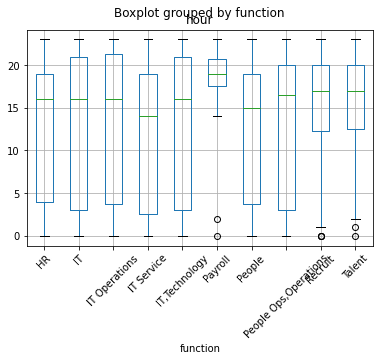

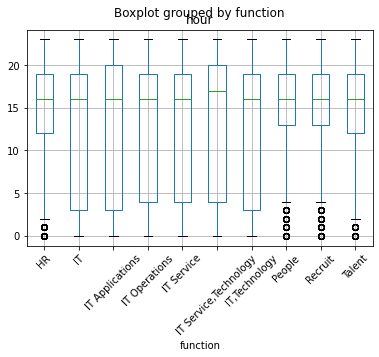

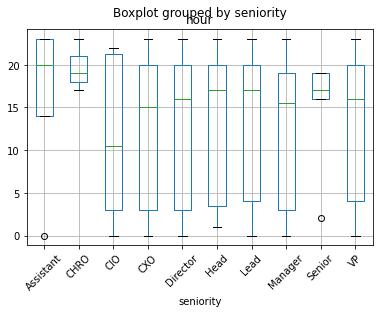

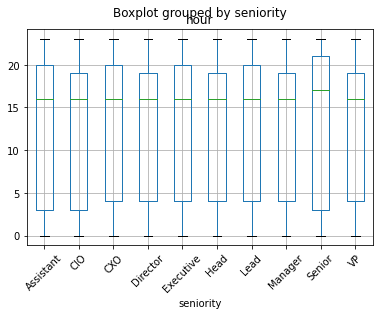

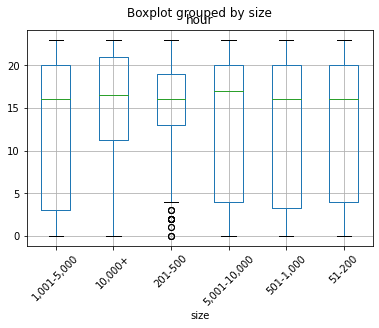

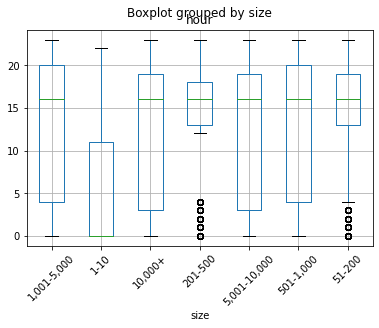

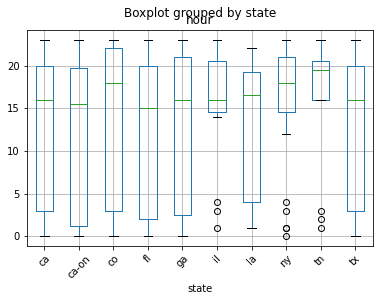

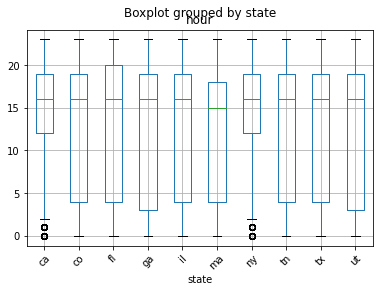

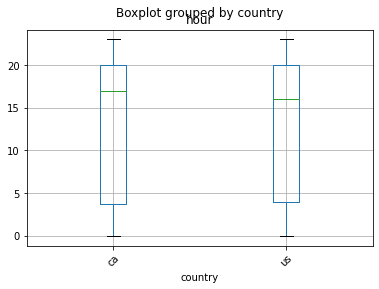

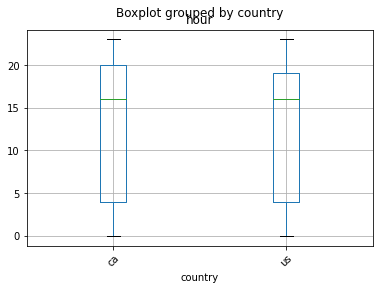

In [409]:
for col in ['function', 'seniority', 'size', 'state', 'country']:
    for curr_df in [df[df.success], df[~df.success]]:
        get_boxplot_of_most_frequent(curr_df, 10, col, col, 'hour')